<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Sequential_Data%26Recurrent_Neural_Networks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Words Embeddings

- 언어를 벡터로 표현한 것

- 종류

>- Word2Vec: 한 단어를 중심 단어(w_t)로 두고, 그 주변에 t개 전후 이웃 단어들이 나타날 확률을 모두 곱한 것을 likelihood로 둬서 이를 최대화시키도록 벡터를 만드는 과정

>> 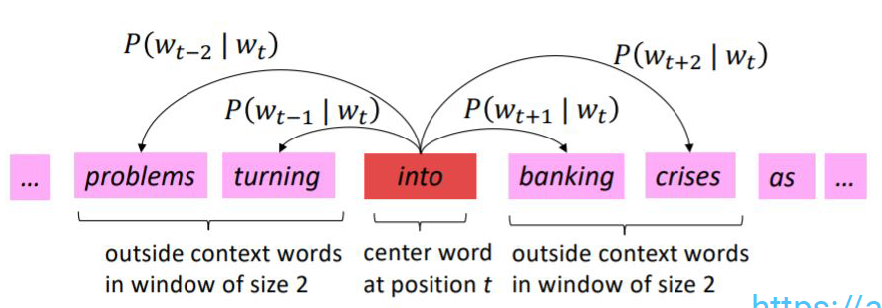

>> 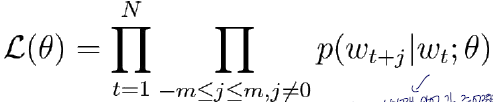


>- GloVe: 한 단어를 기준으로, 같이 일어날 단어들의 조건부 확률을 구하는 것


>> 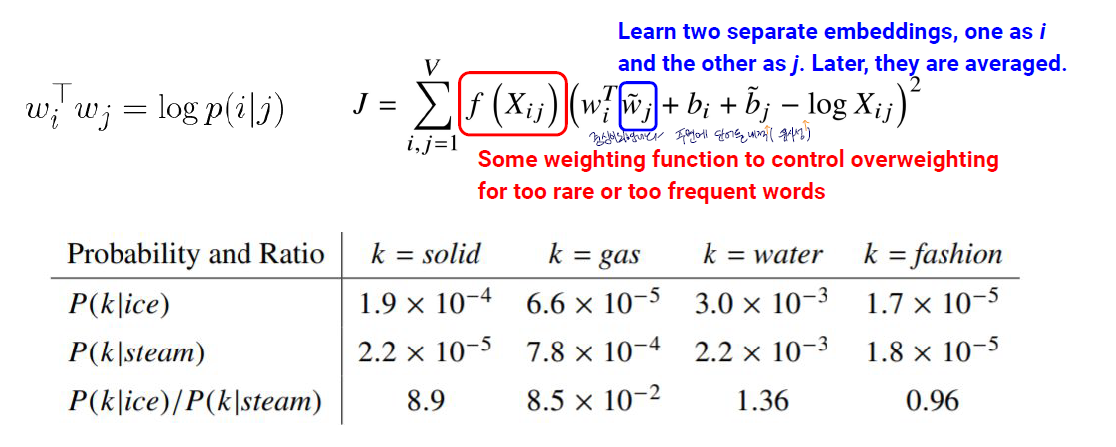

## 2. RNN for sequential classification (many-to-one)


- 배경:
(예시) 문장을 받아서 각 단어를 GloVe로 word embedding한 것을 Conv filter로 Classify를 할시에, CNN은 input의 길이가 정해져 있는 경우에만 쓸 수 있음 (filter,stride가 정해져있으니까). 하지만, 임의의 길이 (arbitrary length)의 문장에도 유연하게 판별할 수 있는 모델을 찾고 싶음

<br/>

- Encoder로 해결: 아래 몇개의 Embedding이 있던 간에, 하나의 Encoder로 합쳐서 처리하자!

>> 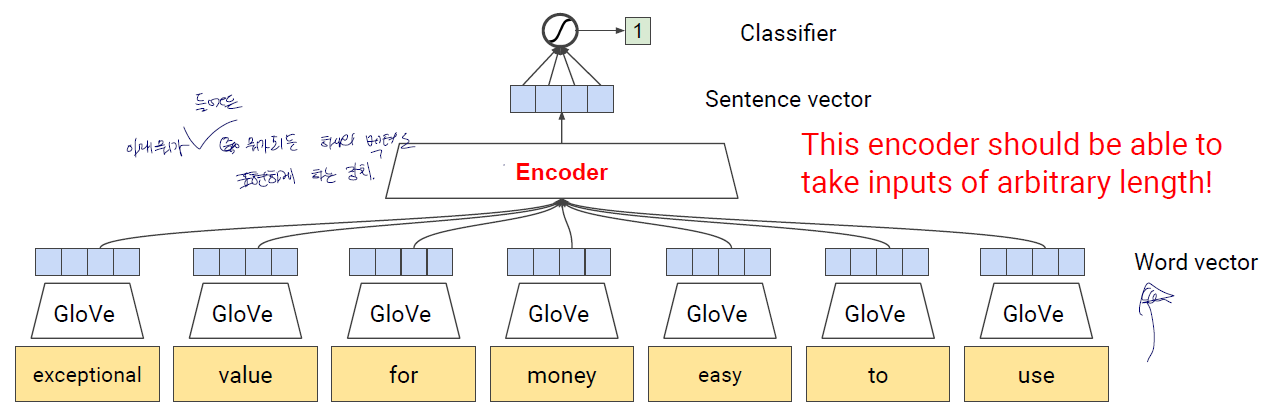


- RNN: new internal state(h_t)가 old state(h_t-1)와 각각의 input(x_t)으로 결정되는 과정

>> 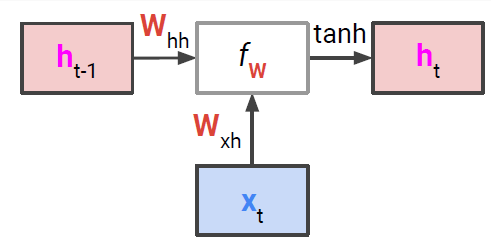

>> 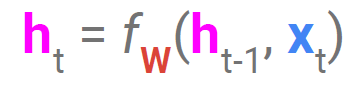

>> (중요) **매 state 에서 같은 w를 사용해야 함**

>- Forward Pass: Whh, Wxh, Why 모두 고정된 값인 상태에서 계속 곱해나가면서 y_hat 추정하기


>> 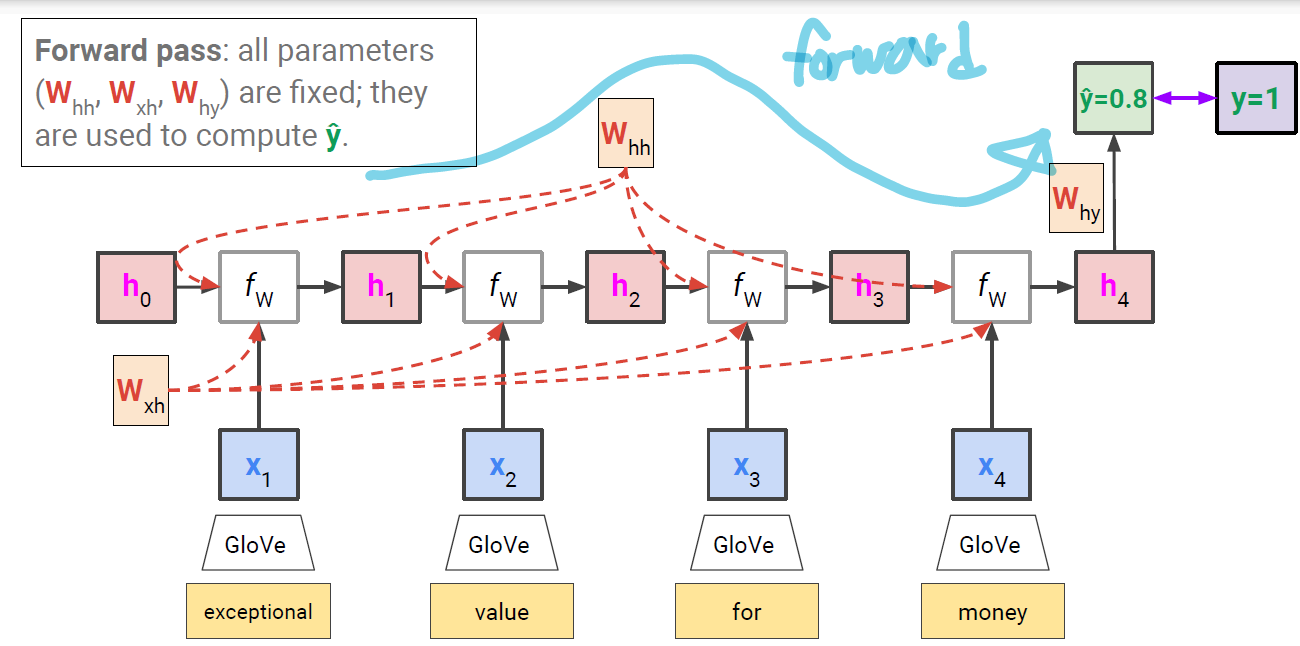


>- Backpropagation: Whh, Wxh, Why를 구하기 위함

>> 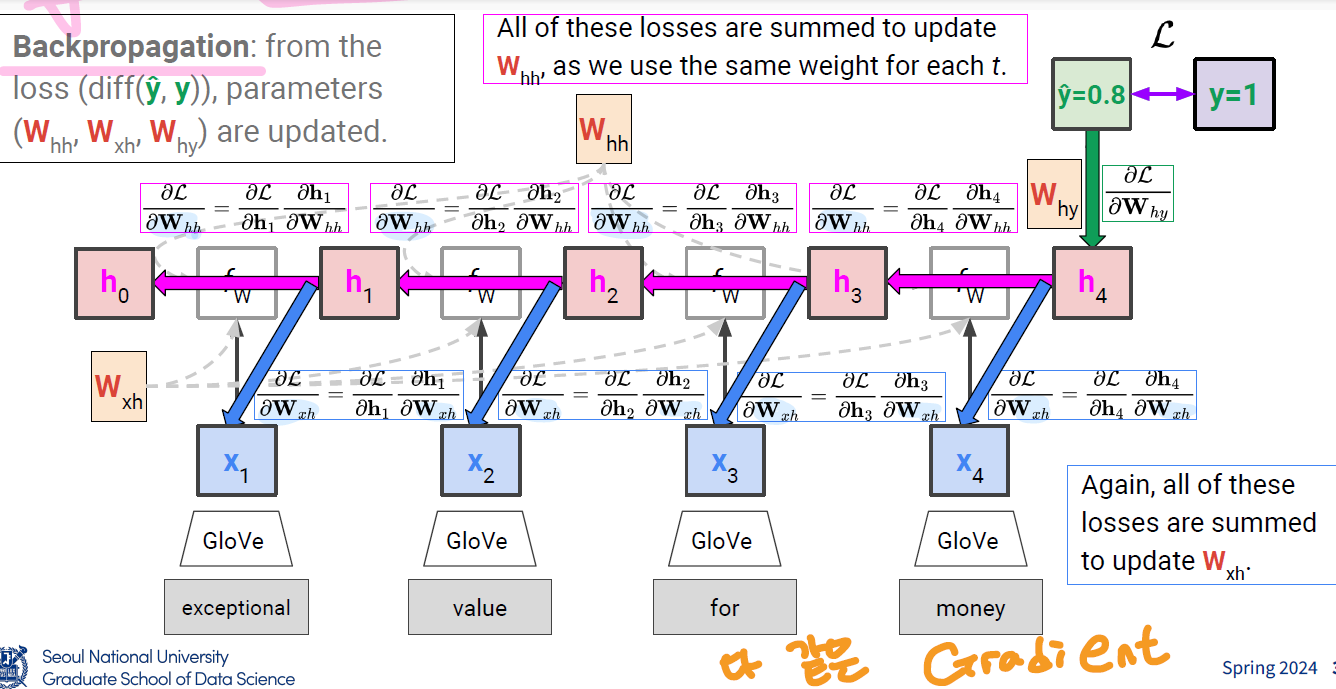





## 3. RNN for Sequential Prediction (many-to-many)

- 단어를 보고 그 뒤에 나오는 단어를 예측해야하는 문제


- 종류

>- n-grams: 이전에 n개의 단어들을 보고 다음 단어가 뭐가 나올지 예측하는 것 -> computational burden이 너무 큼

>- **RNN**: 아무리 문장이 길어져도, 같은 Whh, Why,,을 사용하니까 메모리가 증가하지 않음. 단, 문장 단위로 쭉 하나의 y를 예측하면 curse of dimensionality의 문제가 생길 수 있으므로, 단어 하나하나당 y를 예측하자

>> loss 계산으로는 cross-entropy를 주로 씀.

>> Backpropagation

>> 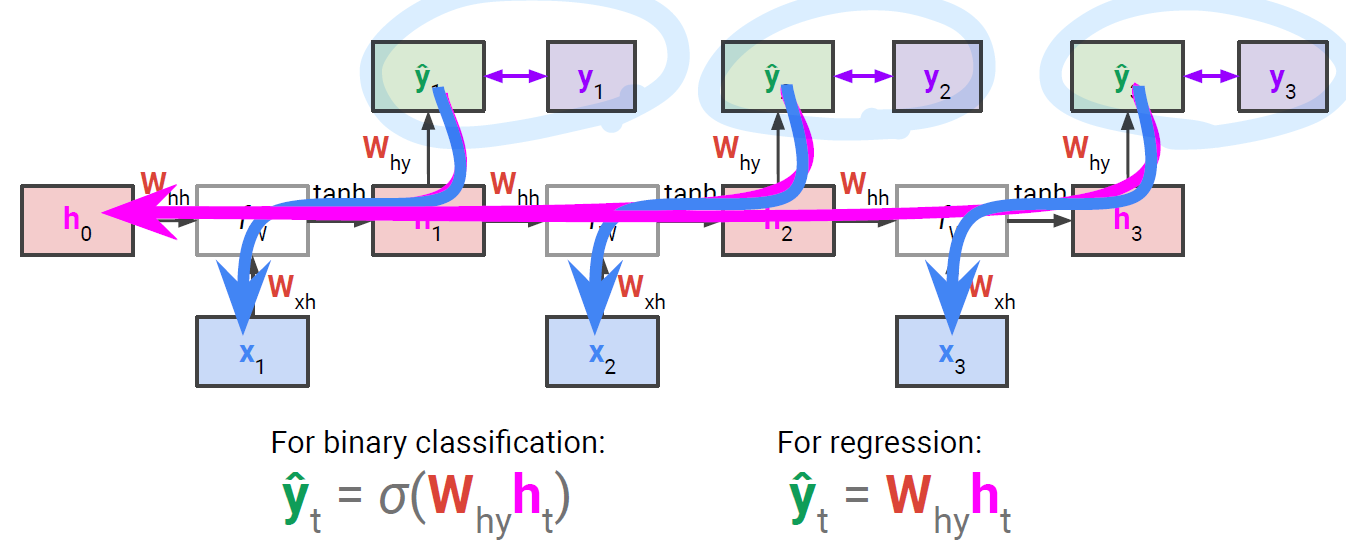

>>- Multilayer-RNN:아래와 같이 층을 여러층 쌓아서 RNN을 만들 수 있음

>>> 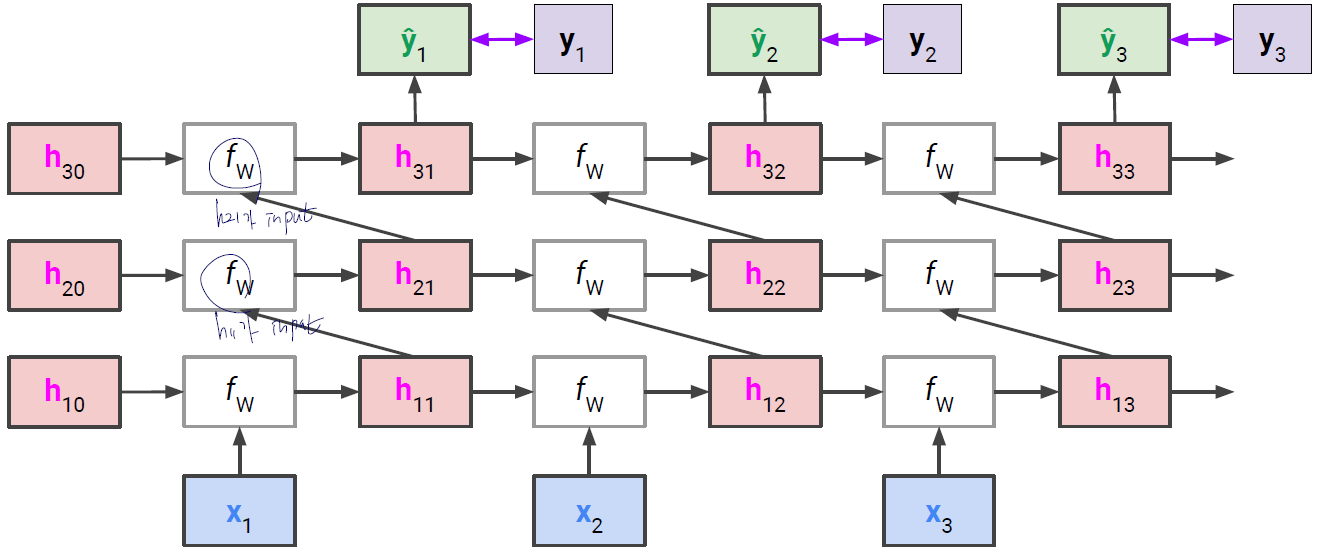




In [ ]:
rnn = nn.RNN(10, 20, 3) #10: INPUT dimension, 20:hidden state의 개수 (보통input보다 많아야) 3:layer 개수
input = torch.randn(5, 64, 10) #5:sequential length(빨리 계산하려고 지정해버림), 64:batch size,10:INPUT dimension
h0 = torch.randn(3, 64, 20) #initalization
output, hn = rnn(input, h0)

- 장점

>> 1) input의 길이가 얼마나 되든 상관 없음

>> 2) model size가 커지지 않음

>> 3) 오래된 정보를 담고 있음


>> 4) 매번 같은 weight 사용

- 단점

>> 1) 느림

>> 2) gradient가 사라지는 문제

>> 3) 옛날 정보 잘 기억 못할 수 있음
